In [21]:
import pandas as pd

# Load the uploaded CSV file
file_path = 'heart.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head(), data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


(   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
 0   52    1   0       125   212    0        1      168      0      1.0      2   
 1   53    1   0       140   203    1        0      155      1      3.1      0   
 2   70    1   0       145   174    0        1      125      1      2.6      0   
 3   61    1   0       148   203    0        1      161      0      0.0      2   
 4   62    0   0       138   294    1        1      106      0      1.9      1   
 
    ca  thal  target  
 0   2     3       0  
 1   0     3       0  
 2   0     3       0  
 3   1     3       0  
 4   3     2       0  ,
 None)

# logistics regression

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data into features (X) and target (y)
X = data.drop(columns='target')
y = data['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate additional metrics from confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()
misclassification_rate = (fp + fn) / len(y_test)
true_positive_rate = tp / (tp + fn)
false_negative = fn
false_positive = fp
true_negative = tn

# Display calculated metrics
metrics = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1,
    "Misclassification Rate": misclassification_rate,
    "True Positive Rate": true_positive_rate,
    "False Negative": false_negative,
    "True Negative": true_negative,
    "False Positive": false_positive
}
metrics, conf_matrix


({'Accuracy': 0.8181818181818182,
  'Precision': 0.7833333333333333,
  'Recall': 0.8924050632911392,
  'F1 Score': 0.8343195266272189,
  'Misclassification Rate': 0.18181818181818182,
  'True Positive Rate': 0.8924050632911392,
  'False Negative': 17,
  'True Negative': 111,
  'False Positive': 39},
 array([[111,  39],
        [ 17, 141]], dtype=int64))

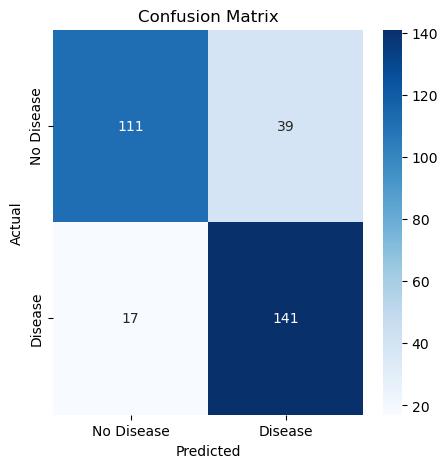

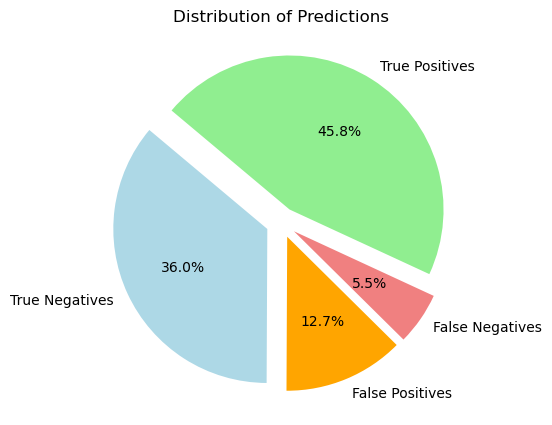

In [8]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Create a pie chart for the distribution of predictions
labels = ['True Negatives', 'False Positives', 'False Negatives', 'True Positives']
sizes = [true_negative, false_positive, false_negative, tp]
colors = ['lightblue', 'orange', 'lightcoral', 'lightgreen']
explode = (0.1, 0.1, 0.1, 0.1)  # "explode" all slices for emphasis

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)
plt.title('Distribution of Predictions')
plt.show()


# DECISION TREE

In [24]:
import pandas as pd

# Load the dataset
file_path = 'heart.csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset
data_info = data.info()
data_head = data.head()
data_info, data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


(None,
    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
 0   52    1   0       125   212    0        1      168      0      1.0      2   
 1   53    1   0       140   203    1        0      155      1      3.1      0   
 2   70    1   0       145   174    0        1      125      1      2.6      0   
 3   61    1   0       148   203    0        1      161      0      0.0      2   
 4   62    0   0       138   294    1        1      106      0      1.9      1   
 
    ca  thal  target  
 0   2     3       0  
 1   0     3       0  
 2   0     3       0  
 3   1     3       0  
 4   3     2       0  )

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns

# Split data into features and target
X = data.drop(columns='target')
y = data['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Confusion matrix for additional metrics
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Misclassification rate, true positive rate, false positive rate, and true negative rate
misclassification_rate = 1 - accuracy
true_positive_rate = tp / (tp + fn)
false_positive_rate = fp / (fp + tn)
true_negative_rate = tn / (tn + fp)
false_negative_rate = fn / (fn + tp)

# Display the metrics
metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'Misclassification Rate': misclassification_rate,
    'True Positive Rate': true_positive_rate,
    'False Positive Rate': false_positive_rate,
    'True Negative Rate': true_negative_rate,
    'False Negative Rate': false_negative_rate
}
metrics

{'Accuracy': 0.9707792207792207,
 'Precision': 1.0,
 'Recall': 0.9395973154362416,
 'F1 Score': 0.9688581314878892,
 'Misclassification Rate': 0.02922077922077926,
 'True Positive Rate': 0.9395973154362416,
 'False Positive Rate': 0.0,
 'True Negative Rate': 1.0,
 'False Negative Rate': 0.06040268456375839}

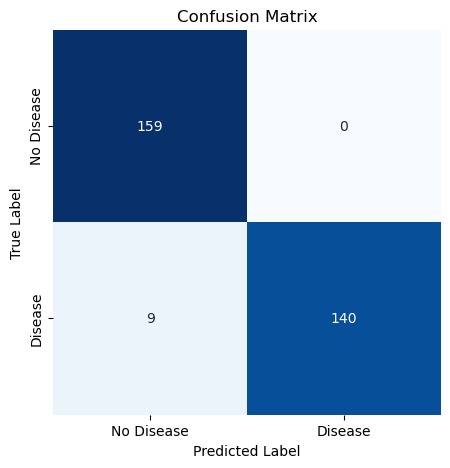

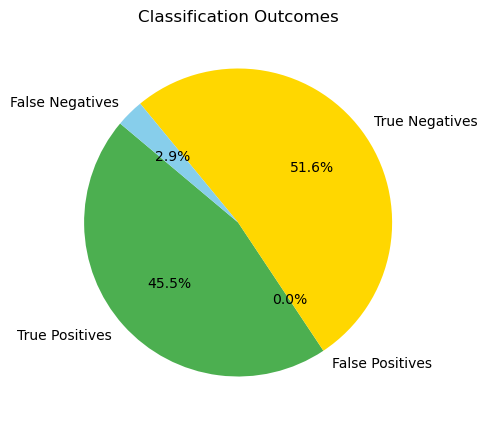

In [26]:
# Confusion Matrix heatmap
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Pie chart of True Positives, False Positives, True Negatives, and False Negatives
plt.figure(figsize=(5,5))

# Define data and labels
conf_matrix_counts = [tp, fp, tn, fn]
conf_matrix_labels = ['True Positives', 'False Positives', 'True Negatives', 'False Negatives']

# Pie chart for visualizing classification results
plt.pie(conf_matrix_counts, labels=conf_matrix_labels, autopct='%1.1f%%', startangle=140, colors=['#4CAF50', '#FF6347', '#FFD700', '#87CEEB'])
plt.title("Classification Outcomes")
plt.show()


# SVM

In [12]:
from sklearn.svm import SVC

# Train a Support Vector Machine classifier
svm_clf = SVC(random_state=42)
svm_clf.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_clf.predict(X_test)

# Calculate metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

# Confusion matrix for additional metrics
tn_svm, fp_svm, fn_svm, tp_svm = confusion_matrix(y_test, y_pred_svm).ravel()

# Misclassification rate, true positive rate, false positive rate, and true negative rate
misclassification_rate_svm = 1 - accuracy_svm
true_positive_rate_svm = tp_svm / (tp_svm + fn_svm)
false_positive_rate_svm = fp_svm / (fp_svm + tn_svm)
true_negative_rate_svm = tn_svm / (tn_svm + fp_svm)
false_negative_rate_svm = fn_svm / (fn_svm + tp_svm)

# Display the metrics
metrics_svm = {
    'Accuracy': accuracy_svm,
    'Precision': precision_svm,
    'Recall': recall_svm,
    'F1 Score': f1_svm,
    'Misclassification Rate': misclassification_rate_svm,
    'True Positive Rate': true_positive_rate_svm,
    'False Positive Rate': false_positive_rate_svm,
    'True Negative Rate': true_negative_rate_svm,
    'False Negative Rate': false_negative_rate_svm
}
metrics_svm

{'Accuracy': 0.6753246753246753,
 'Precision': 0.6467065868263473,
 'Recall': 0.7248322147651006,
 'F1 Score': 0.6835443037974682,
 'Misclassification Rate': 0.3246753246753247,
 'True Positive Rate': 0.7248322147651006,
 'False Positive Rate': 0.3710691823899371,
 'True Negative Rate': 0.6289308176100629,
 'False Negative Rate': 0.2751677852348993}

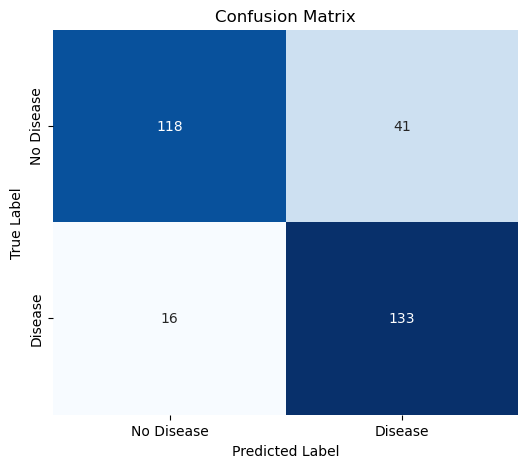

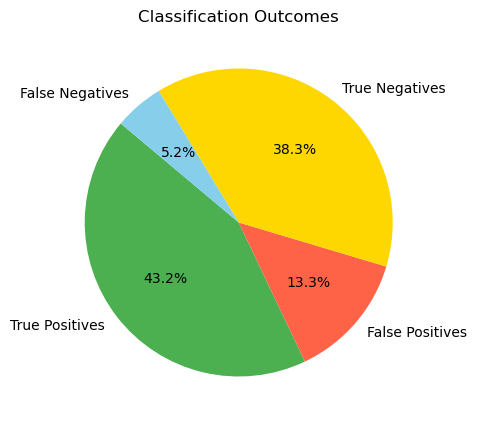

In [20]:
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Pie chart of True Positives, False Positives, True Negatives, and False Negatives
plt.figure(figsize=(10, 5))

# Define data and labels
conf_matrix_counts = [tp, fp, tn, fn]
conf_matrix_labels = ['True Positives', 'False Positives', 'True Negatives', 'False Negatives']

# Pie chart for visualizing classification results
plt.pie(conf_matrix_counts, labels=conf_matrix_labels, autopct='%1.1f%%', startangle=140, 
        colors=['#4CAF50', '#FF6347', '#FFD700', '#87CEEB'])
plt.title("Classification Outcomes")
plt.show()

# Random Forest

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('heart.csv')

# Split data into features and target
X = data.drop(columns='target')
y = data['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Confusion matrix for additional metrics
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Misclassification rate, true positive rate, false positive rate, and true negative rate
misclassification_rate = 1 - accuracy
true_positive_rate = tp / (tp + fn)
false_positive_rate = fp / (fp + tn)
true_negative_rate = tn / (tn + fp)
false_negative_rate = fn / (fn + tp)

# Display the metrics
metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'Misclassification Rate': misclassification_rate,
    'True Positive Rate': true_positive_rate,
    'False Positive Rate': false_positive_rate,
    'True Negative Rate': true_negative_rate,
    'False Negative Rate': false_negative_rate
}
print(metrics)

{'Accuracy': 0.9805194805194806, 'Precision': 1.0, 'Recall': 0.959731543624161, 'F1 Score': 0.9794520547945206, 'Misclassification Rate': 0.01948051948051943, 'True Positive Rate': 0.959731543624161, 'False Positive Rate': 0.0, 'True Negative Rate': 1.0, 'False Negative Rate': 0.040268456375838924}


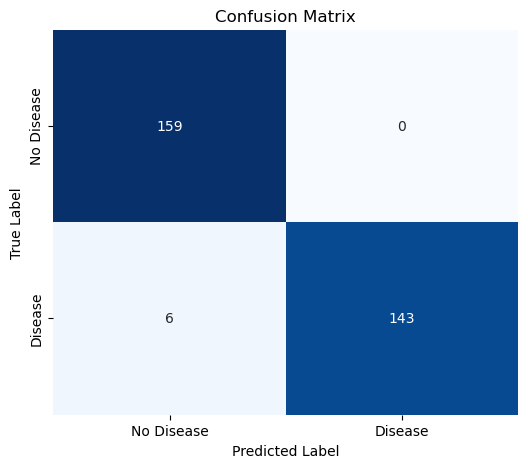

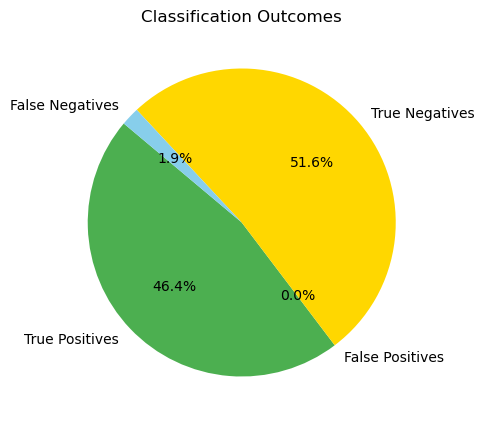

In [15]:
# Confusion Matrix heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Pie chart of True Positives, False Positives, True Negatives, and False Negatives
plt.figure(figsize=(10, 5))

# Define data and labels
conf_matrix_counts = [tp, fp, tn, fn]
conf_matrix_labels = ['True Positives', 'False Positives', 'True Negatives', 'False Negatives']

# Pie chart for visualizing classification results
plt.pie(conf_matrix_counts, labels=conf_matrix_labels, autopct='%1.1f%%', startangle=140, 
        colors=['#4CAF50', '#FF6347', '#FFD700', '#87CEEB'])
plt.title("Classification Outcomes")
plt.show()

# Naive Bayes

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns

# Update this to your file location
data = pd.read_csv('heart.csv')

# Split data into features and target
X = data.drop(columns='target')
y = data['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Naive Bayes classifier
clf = GaussianNB()
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Confusion matrix for additional metrics
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Misclassification rate, true positive rate, false positive rate, and true negative rate
misclassification_rate = 1 - accuracy
true_positive_rate = tp / (tp + fn)
false_positive_rate = fp / (fp + tn)
true_negative_rate = tn / (tn + fp)
false_negative_rate = fn / (fn + tp)

# Display the metrics
metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'Misclassification Rate': misclassification_rate,
    'True Positive Rate': true_positive_rate,
    'False Positive Rate': false_positive_rate,
    'True Negative Rate': true_negative_rate,
    'False Negative Rate': false_negative_rate
}
print(metrics)

{'Accuracy': 0.814935064935065, 'Precision': 0.764367816091954, 'Recall': 0.8926174496644296, 'F1 Score': 0.8235294117647058, 'Misclassification Rate': 0.18506493506493504, 'True Positive Rate': 0.8926174496644296, 'False Positive Rate': 0.2578616352201258, 'True Negative Rate': 0.7421383647798742, 'False Negative Rate': 0.10738255033557047}


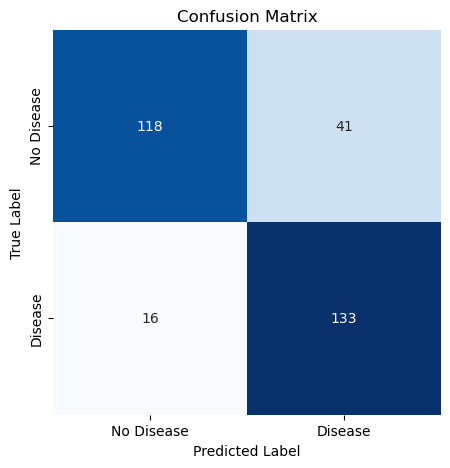

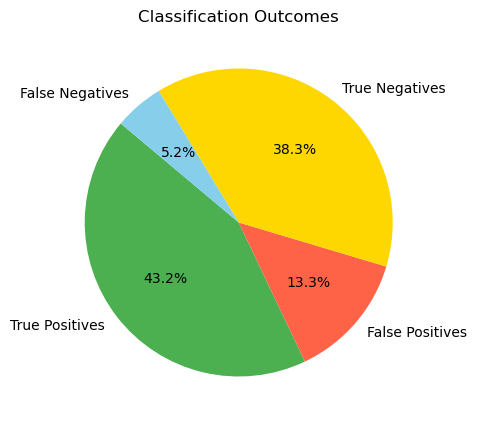

In [19]:
# Confusion Matrix heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Pie chart of True Positives, False Positives, True Negatives, and False Negatives
plt.figure(figsize=(5, 5))

# Define data and labels
conf_matrix_counts = [tp, fp, tn, fn]
conf_matrix_labels = ['True Positives', 'False Positives', 'True Negatives', 'False Negatives']

# Pie chart for visualizing classification results
plt.pie(conf_matrix_counts, labels=conf_matrix_labels, autopct='%1.1f%%', startangle=140, 
        colors=['#4CAF50', '#FF6347', '#FFD700', '#87CEEB'])
plt.title("Classification Outcomes")
plt.show()
